# Explore here

### Paso 1: Carga de los datos

In [ ]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")
total_data.head(15)

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
5,https://www.brookings.edu/interactives/reopeni...,False
6,https://www.reuters.com/investigates/special-r...,False
7,https://www.theatlantic.com/magazine/archive/2...,False
8,https://www.vox.com/2020/6/17/21294680/john-bo...,False
9,https://www.theguardian.com/travel/2020/jun/18...,False


In [31]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


### Paso 2: Analisis Exploratorio de los datos

In [32]:
duplicates = total_data.duplicated().sum()
print(duplicates)

630


In [33]:
total_data2 = total_data.drop_duplicates()
total_data2 = total_data2.reset_index(inplace = False, drop = True)
print("Shape de los Datos", total_data2.shape)
print(f"Spam: {len(total_data2.loc[total_data2.is_spam == 1])}")
print(f"No spam: {len(total_data2.loc[total_data2.is_spam == 0])}")

Shape de los Datos (2369, 2)
Spam: 244
No spam: 2125


#### Hasta este punto, hemos eliminado los datos repetidos reduciendo la data en 630 elemento, quedando un espacio muestras de 2369 elementos.

#### De estas muetras tenemos 244 Elementos identificados como spam y 2125 correos Validos.

In [34]:
import re


def preprocess_url(url):
    # Convertir a minúsculas
    url = url.lower()

    # Eliminar todos los signos de puntuación y los términos comunes
    url = re.sub(r'[^\w\s]|www|https?|http|com', '', url)

    url = re.sub(r'\d+', '', url)

    # Dividir la URL en partes
 # Encontrar y seleccionar solo palabras completas
    words = re.findall(r'\b[a-zA-Z]+\b', url)

    # Formatear las palabras entre corchetes []
    url_processed = "[" + ",".join(words) + "]"

    return url_processed

# Aplicar el preprocesamiento a la columna "URL" del DataFrame
total_data2["url"] = total_data2["url"].apply(preprocess_url)

# Mostrar las primeras filas del DataFrame para verificar el resultado
total_data2.head(10)

,url,is_spam
0,[briefingdayuslistmanageunsubscribe],True
1,[hvper],True
2,[briefingdaymvnif],True
3,[briefingdaynmmentform],False
4,[briefingdayfan],True
5,[brookingseduinteractivesreopeningamericaandth...,False
6,[reutersinvestigatesspecialreporthealthcoronav...,False
7,[theatlanticmagazinearchivesupermarketsareamir...,False
8,[voxjohnboltonbookexcerptstrumpukrainechina],False
9,[theguardiantraveljunendoftourismcoronaviruspa...,False


#### Crearemos la "wordcloud" con la combinacion de las palabras mas usadas.   Se uso width=800, height=800


Counter({'briefingdaynmmentform': 13, 'morningbrewdaily': 10, 'mailchimpbigspaceshipbigspaceshipsinternetbrunch': 7, 'bbcnewsbusiness': 6, 'bbcnewsworlduscanada': 5, 'cnbcstockmarketfuturesopentoclosenewshtml': 4, 'usforwardtofriendforward': 3, 'naturearticlesd': 3, 'briefingdaynm': 3, 'morningbrewdailylatest': 2, 'morningbrewdailyr': 2, 'bbcnewsscienceenvironment': 2, 'getdrinkhydrantskimmjune': 2, 'theguardianworldjuncoronavirusworldmapwhichcountrieshavethemostcovidcasesanddeaths': 2, 'morningbrewdailystoriesweekreviewcrosswordjune': 2, 'morningbrewdailystoriesweekaheadjune': 2, 'nytimesworldcoronavirusupdateshtml': 2, 'magicspoonproductsnutpackcaseboxes': 2, 'sciencedailyreleaseshtm': 2, 'worldviewstratforarticlegeopoliticsunitedstatespartinevitableempire': 2, 'morningbrewmarketing': 2, 'bbcnewstechnology': 2, 'playbillarticlebroadwaywillofficiallyremainclosedthrough': 2, 'densediscoveryissues': 2, 'numlocksubstackpnumlocksundayjohnjacksonmiller': 2, 'numlocksubstackpnumlocksundayda

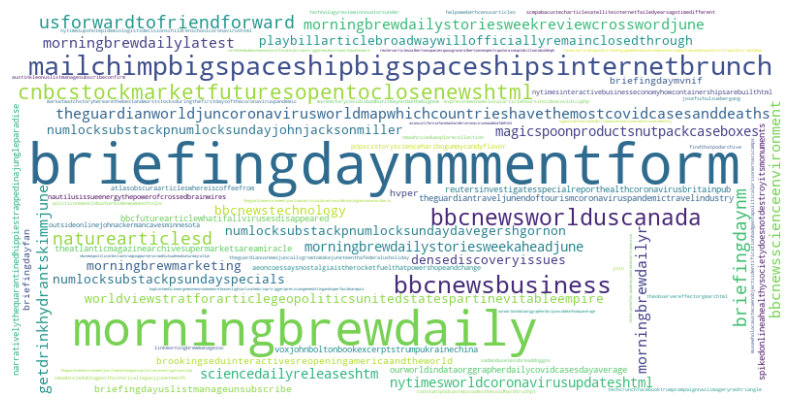

In [53]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para extraer tokens de una URL procesada
def extract_tokens(url):
    # Remover corchetes y comas
    url = re.sub(r'[\[\],]', '', url)
    
    # Dividir la URL procesada en tokens (palabras)
    tokens = url.split()
    
    return tokens

tokens_list = total_data2["url"].apply(extract_tokens)

all_tokens = [token for tokens in tokens_list for token in tokens]

token_freq = Counter(all_tokens)
print(token_freq)
# Crear la wordcloud a partir de los tokens y sus frecuencias
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_freq)

# Mostrar la wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Transformaremos las variables categoricas de la columna "is_spam" en variables numericas.  Ya que la mayoria de los modelos funcionan no funcionan con variables categoricas.

In [ ]:
total_data3["is_spam"] = total_data2["is_spam"].apply(lambda x: 1 if x == "spam" else 0).astype(int)
total_data.head()



#### El último paso antes de entrenar el modelo es convertirlo en números, ya que los modelos no pueden entrenar con categorías textuales. 

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir la lista de tokens en una lista de strings
tokens_list_str = [" ".join(tokens) for tokens in tokens_list]

# Vectorizamos
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=5)

# Aplicar TfidfVectorizer a la lista de tokens
X = vectorizer.fit_transform(tokens_list_str).toarray()
y = total_data2["is_spam"]

# Mostrar las primeras 5 filas de la matriz X
X[:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

###  Paso 3: Entrenamiento del modelo

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define los hiperparámetros a ajustar
param_grid = {
    'C': [0.1, 1, 10, 100],                    # Parámetro de regularización
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Tipo de kernel
    'gamma': ['scale', 'auto'],                # Coeficiente del kernel
    'class_weight': [None, 'balanced'],        # Peso de las clases
    'probability': [True, False],               # Habilitar predicción de probabilidades
    'shrinking': [True, False],                 # Reducción de vectores de soporte
}

# Instancia el modelo SVC
svm_model = SVC()

# Realiza la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Ajusta el modelo a los datos
grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Muestra la mejor puntuación obtenida
print("Mejor puntuación:", grid_search.best_score_)

Mejores hiperparámetros: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear', 'probability': True, 'shrinking': True}
Mejor puntuación: 0.8918205804749342


#### Con el estudio de los Hiper parametros, procedo a entrenar el modelo.

In [ ]:
# Instancing the SVM with best params
best_svcm = SVC(
    C=0.1,
    gamma='scale',
    kernel='linear',
    probability=True,
    shrinking=True,
    random_state=42
)

# Training data
best_svcm.fit(X_train, y_train)

#Training data
best_svcm.fit(X_train, y_train)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1980220861.py, line 2)

### Paso 4: Predicción y evaluación

In [ ]:
#Pred on test
y_pred_Final = best_svcm.predict(X_test)

print(confusion_matrix(y_test, y_pred_Final))
print(classification_report(y_test, y_pred_Final))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcula las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_Final)
precision = precision_score(y_test, y_pred_Final, average='weighted')  # o 'micro', 'macro', 'weighted'
recall = recall_score(y_test, y_pred_Final, average='weighted')  # o 'micro', 'macro', 'weighted'
f1 = f1_score(y_test, y_pred_Final, average='weighted')  # o 'micro', 'macro', 'weighted'

# Imprime las métricas
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

### Paso 5: Guardar el modelo

In [ ]:
import joblib

joblib.dump(best_svcm, 'svm_spam_detector_model.joblib')